In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
df = pd.read_csv("processed/zheng_career_matches.csv")
df = df.drop(['BPSaved', 'Time'], axis=1).dropna()

# column names
playerNames = 'playerNames'
df.rename(columns={'Unnamed: 6': playerNames}, inplace=True)
df

,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%
2,8‑May‑2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,6.7%,5.6%,51.1%,71.7%,40.9%
3,8‑May‑2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,4.1%,8.2%,59.2%,75.9%,42.5%
4,8‑May‑2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,5.1%,5.1%,62.8%,63.3%,48.3%
5,8‑May‑2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,7.0%,4.2%,60.6%,74.4%,53.6%
6,24‑Apr‑2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,10.5%,7.4%,44.2%,71.4%,47.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,24‑May‑2021,Strasbourg,Clay,Q1,254.0,580.0,(SR)Karman Thandi [IND] d. (11)Zheng,6-3 4-6 7-6(1),0.91,2.9%,6.7%,54.8%,64.9%,40.4%
184,7‑Oct‑2019,Tianjin,Hard,Q2,703.0,224.0,Shuyue Ma [CHN] d. Zheng,1-6 6-2 7-5,0.86,7.1%,4.1%,62.2%,60.7%,48.6%
185,7‑Oct‑2019,Tianjin,Hard,Q1,703.0,763.0,Zheng d. (WC)Qianhui Tang [CHN],6-4 6-3,1.21,1.4%,6.9%,43.1%,64.5%,51.2%
186,23‑Sep‑2019,Wuhan,Hard,Q1,697.0,69.0,(6)Svetlana Kuznetsova [RUS] d. (WC)Zheng,6-2 6-4,0.68,5.2%,3.9%,54.5%,66.7%,34.3%


In [3]:
surface = 'Surface'
score = 'Score'
dateStr = 'Date'
dateObj = 'dateObj'
sampleSize = 'sampleSize'

# opponents' rank
vRk = 'vRk'
# ace minus df
serveNetGain = 'serveNetGain'
aceRate = 'A%'
dfRate = 'DF%'
firstServeIn = '1stIn'
firstServeWin = '1st%'
secondServeWin = '2nd%'
win = 'win'
# player name
playerOfInterest = 'Zheng'
# surface type
grass = 'Grass'
hard = 'Hard'
clay = 'Clay'
retire = 'RET'
# group frequency
freq = 'M'

In [4]:
# filter data
df[dateStr] = df[dateStr].str.replace('\u2011', '-')
df[dateObj] = pd.to_datetime(df[dateStr], format='%d-%b-%Y') 
df['year'] = df[dateObj].dt.year
df['month'] = df[dateObj].dt.month
df = df[df[dateObj].dt.year >= 2022]
# remove RET
df = df[~df[score].str.contains(retire)]
# remove Grass
df = df[~df[surface].str.contains(grass)]
df

,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%,dateObj,year,month
2,8-May-2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,6.7%,5.6%,51.1%,71.7%,40.9%,2023-05-08,2023,5
3,8-May-2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,4.1%,8.2%,59.2%,75.9%,42.5%,2023-05-08,2023,5
4,8-May-2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,5.1%,5.1%,62.8%,63.3%,48.3%,2023-05-08,2023,5
5,8-May-2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,7.0%,4.2%,60.6%,74.4%,53.6%,2023-05-08,2023,5
6,24-Apr-2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,10.5%,7.4%,44.2%,71.4%,47.2%,2023-04-24,2023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17-Jan-2022,Australian Open,Hard,Q1,108.0,161.0,(13)Zheng d. Coco Vandeweghe [USA],1-6 7-6(5) 6-1,1.00,4.6%,9.2%,51.7%,77.8%,42.9%,2022-01-17,2022,1
82,3-Jan-2022,Melbourne 1,Hard,R16,126.0,81.0,(Q)Zheng d. Vera Zvonareva [RUS],5-7 6-3 6-4,1.09,11.7%,8.1%,49.5%,80.0%,41.1%,2022-01-03,2022,1
83,3-Jan-2022,Melbourne 1,Hard,R32,126.0,150.0,(Q)Zheng d. (LL)Mai Hontama [JPN],4-6 6-2 6-3,1.14,6.8%,9.1%,53.4%,63.8%,46.3%,2022-01-03,2022,1
84,3-Jan-2022,Melbourne 1,Hard,Q2,126.0,93.0,(11)Zheng d. (3)Bernarda Pera [USA],6-3 1-6 7-5,0.97,7.9%,5.3%,43.4%,75.8%,44.2%,2022-01-03,2022,1


In [5]:
# convert to float
cols_to_convert = [aceRate, dfRate, firstServeIn, firstServeWin, secondServeWin]

for col in cols_to_convert:
        df[col] = df[col].str.rstrip('%').astype('float') / 100.0
  
# add more attributes
df[serveNetGain] = df[aceRate] - df[dfRate]
df[win] = df[playerNames].str.split('d.').str[0].str.contains(playerOfInterest)

# partition
top15df = df[df[vRk]<=15]
top50df = df[(df[vRk]<=50) & (df[vRk]>15)]
othersDf = df[df[vRk]>50]

print(f"Num of matches: hard: {len(df[df[surface] == hard])}, clay: {len(df[df[surface] == clay])}")
print(f"vs. top 15: {len(top15df)}, hard: {len(top15df[top15df[surface] == hard])}, clay: {len(top15df[top15df[surface] == clay])}")
print(f"vs. top 50: {len(top50df)}, hard: {len(top50df[top50df[surface] == hard])}, clay: {len(top50df[top50df[surface] == clay])}")
print(f"vs. others: {len(othersDf)}, hard: {len(othersDf[othersDf[surface] == hard])}, clay: {len(othersDf[othersDf[surface] == clay])}")
df


Num of matches: hard: 46, clay: 18
vs. top 15: 12, hard: 9, clay: 3
vs. top 50: 16, hard: 13, clay: 3
vs. others: 36, hard: 24, clay: 12


,Date,Tournament,Surface,Rd,Rk,vRk,playerNames,Score,DR,A%,DF%,1stIn,1st%,2nd%,dateObj,year,month,serveNetGain,win
2,8-May-2023,Rome,Clay,QF,21.0,12.0,(11)Veronika Kudermetova [RUS] d. (22)Zheng,3-6 6-3 6-4,0.89,0.067,0.056,0.511,0.717,0.409,2023-05-08,2023,5,0.011,False
3,8-May-2023,Rome,Clay,R16,21.0,75.0,(22)Zheng d. Xiyu Wang [CHN],6-4 3-6 6-1,1.19,0.041,0.082,0.592,0.759,0.425,2023-05-08,2023,5,-0.041,True
4,8-May-2023,Rome,Clay,R32,21.0,93.0,(22)Zheng d. (Q)Anna Bondar [HUN],7-6(2) 6-4,1.20,0.051,0.051,0.628,0.633,0.483,2023-05-08,2023,5,0.000,True
5,8-May-2023,Rome,Clay,R64,21.0,64.0,(22)Zheng d. Alize Cornet [FRA],6-3 7-6(2),1.41,0.070,0.042,0.606,0.744,0.536,2023-05-08,2023,5,0.028,True
6,24-Apr-2023,Madrid,Clay,R32,24.0,17.0,(16)Ekaterina Alexandrova [RUS] d. (22)Zheng,5-7 6-4 6-2,0.88,0.105,0.074,0.442,0.714,0.472,2023-04-24,2023,4,0.031,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,17-Jan-2022,Australian Open,Hard,Q1,108.0,161.0,(13)Zheng d. Coco Vandeweghe [USA],1-6 7-6(5) 6-1,1.00,0.046,0.092,0.517,0.778,0.429,2022-01-17,2022,1,-0.046,True
82,3-Jan-2022,Melbourne 1,Hard,R16,126.0,81.0,(Q)Zheng d. Vera Zvonareva [RUS],5-7 6-3 6-4,1.09,0.117,0.081,0.495,0.800,0.411,2022-01-03,2022,1,0.036,True
83,3-Jan-2022,Melbourne 1,Hard,R32,126.0,150.0,(Q)Zheng d. (LL)Mai Hontama [JPN],4-6 6-2 6-3,1.14,0.068,0.091,0.534,0.638,0.463,2022-01-03,2022,1,-0.023,True
84,3-Jan-2022,Melbourne 1,Hard,Q2,126.0,93.0,(11)Zheng d. (3)Bernarda Pera [USA],6-3 1-6 7-5,0.97,0.079,0.053,0.434,0.758,0.442,2022-01-03,2022,1,0.026,True


In [6]:
# group by month
def getGroupedDf(df, freq=freq):
    groupedDf = df.groupby(pd.Grouper(key=dateObj, freq=freq)).mean().dropna()
    groupedDf[dateObj] = pd.to_datetime(groupedDf.index.get_level_values(0).astype(str), format='%Y-%m')
    groupedDf[sampleSize] = df.groupby(pd.Grouper(key=dateObj, freq=freq)).size()
    return groupedDf


grouped15 = getGroupedDf(top15df)
grouped15Clay = getGroupedDf(top15df[top15df[surface] == clay])
grouped15Hard = getGroupedDf(top15df[top15df[surface] == hard])

grouped50 = getGroupedDf(top50df)
grouped50Clay = getGroupedDf(top50df[top50df[surface] == clay])
grouped50Hard = getGroupedDf(top50df[top50df[surface] == hard])

groupedOthers = getGroupedDf(othersDf)
groupedOthersClay = getGroupedDf(othersDf[othersDf[surface] == clay])
groupedOthersHard = getGroupedDf(othersDf[othersDf[surface] == hard])


In [7]:
def plotScatterByGroups(groupedDfArr,attributeOfInterest, title,  hline=False):
    labelArr=['vs .top 15', 'vs. top 50', 'vs. others']
    xLabel=dateStr
    yLabel='Percentage'
    dotScale = 10
    PERC = 100
    #plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size
    for i in range(len(groupedDfArr)):
      groupedDf = groupedDfArr[i]
      label = labelArr[i]
      ax.scatter(groupedDf[dateObj], groupedDf[attributeOfInterest] * PERC, label=label, s=dotScale * groupedDf[sampleSize])
      ax.plot(groupedDf[dateObj],  groupedDf[attributeOfInterest] * PERC, '--') 
    ax.set_xlabel(xLabel)  # Label for x-axis
    ax.set_ylabel(yLabel)  # Label for y-axis
    ax.set_title(title)  # Title of the plot
    ax.grid(True)
    if hline:
        ax.axhline(0, color='black') 
    ax.legend()  # Show the legend
    plt.show()  # Display the plot
    

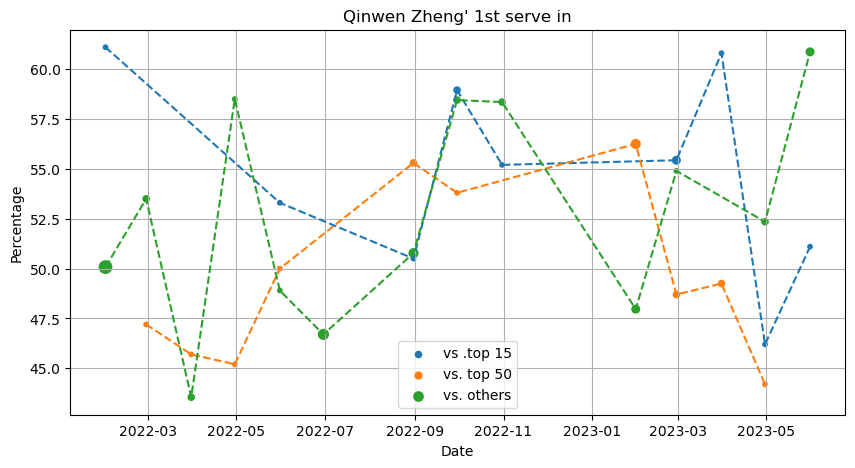

In [8]:
title = 'Qinwen Zheng\' 1st serve in'
attributeOfInterest = firstServeIn
groupedDfArr = [grouped15, grouped50, groupedOthers]
plotScatterByGroups(groupedDfArr, attributeOfInterest, title)

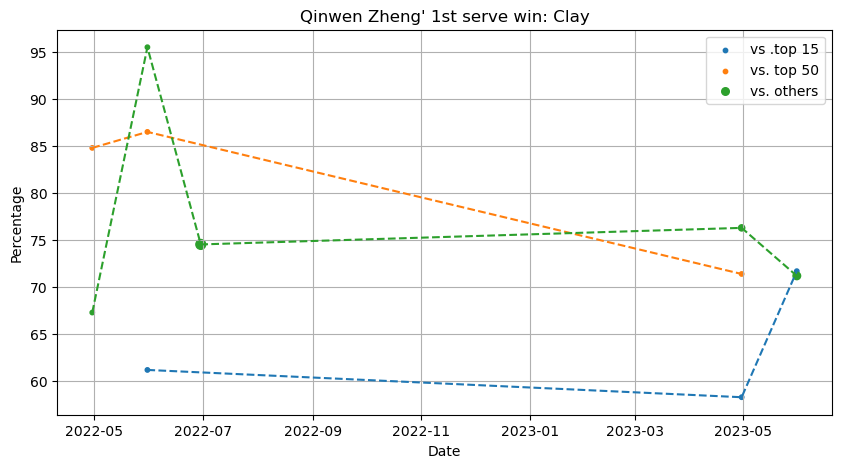

In [9]:
title = 'Qinwen Zheng\' 1st serve win: Clay'
attributeOfInterest = firstServeWin
groupedDfArr = [grouped15Clay, grouped50Clay, groupedOthersClay]
plotScatterByGroups(groupedDfArr, attributeOfInterest, title)

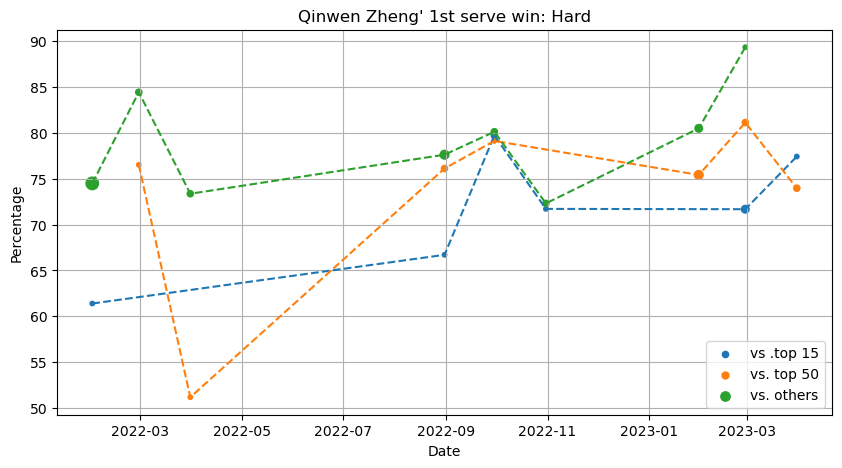

In [10]:
title = 'Qinwen Zheng\' 1st serve win: Hard'
attributeOfInterest = firstServeWin
groupedDfArr = [grouped15Hard, grouped50Hard, groupedOthersHard]
plotScatterByGroups(groupedDfArr, attributeOfInterest, title)

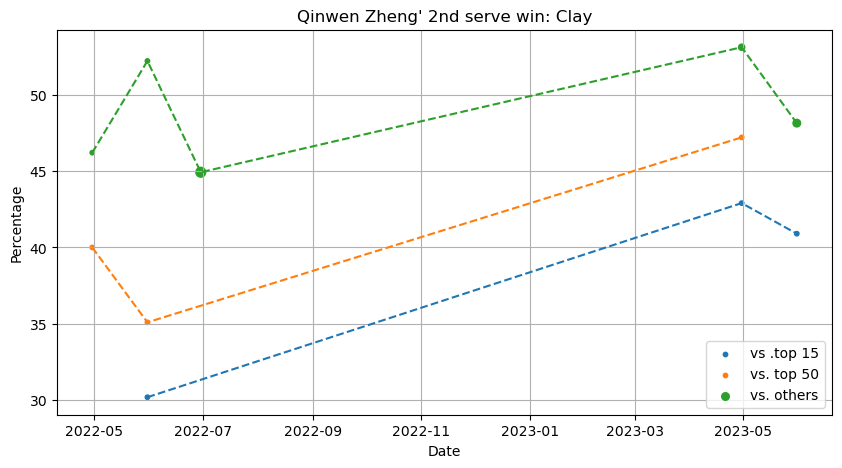

In [11]:
title = 'Qinwen Zheng\' 2nd serve win: Clay'
attributeOfInterest = secondServeWin
groupedDfArr = [grouped15Clay, grouped50Clay, groupedOthersClay]
plotScatterByGroups(groupedDfArr, attributeOfInterest, title)

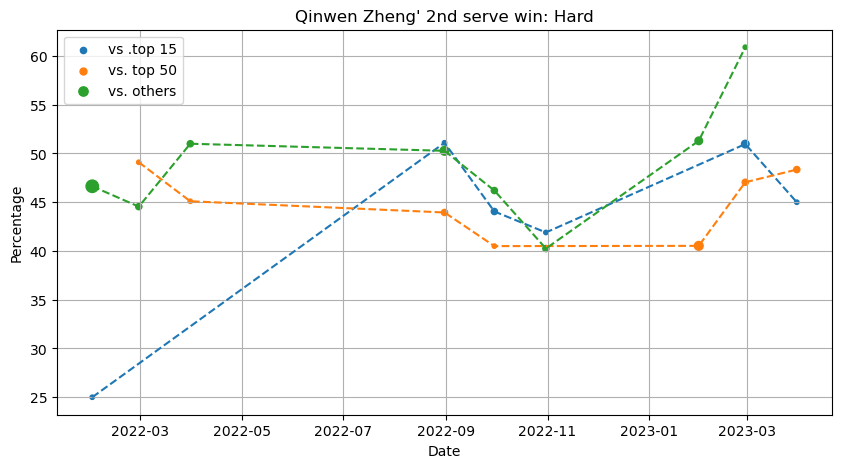

In [12]:
title = 'Qinwen Zheng\' 2nd serve win: Hard'
attributeOfInterest = secondServeWin
groupedDfArr = [grouped15Hard, grouped50Hard, groupedOthersHard]
plotScatterByGroups(groupedDfArr, attributeOfInterest, title)

## alternative design: group by year and also by month

In [42]:
def groupByYearAndMonth(df):
    yearDf = df.groupby(['year', 'month'])[firstServeIn, firstServeWin, secondServeWin, dfRate, aceRate].mean().reset_index()
    yearDf[sampleSize] = df.groupby(['year', 'month']).size().reset_index(name='sample_size')['sample_size']
    yearDf[dateObj] = pd.to_datetime(yearDf[['year', 'month']].assign(day=28))
    return yearDf


def yearCurve(yearDf, attr, title):
    dotScale = 10
    #plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 5))  # Optional: Set the figure size
    for year in yearDf['year'].unique():
        data_year = yearDf[yearDf['year'] == year]
        ax.scatter(data_year['month'], data_year[attr], s=dotScale * data_year[sampleSize])
        ax.plot(data_year['month'], data_year[attr], '--', label=str(year))
        ax.grid(True)

    plt.xlabel('Month')
    plt.ylabel('Percentage')
    plt.title(title)
    plt.legend(title='Year')
    plt.show()
    


/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_26492/1456188405.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearDf = df.groupby(['year', 'month'])[firstServeIn, firstServeWin, secondServeWin, dfRate, aceRate].mean().reset_index()


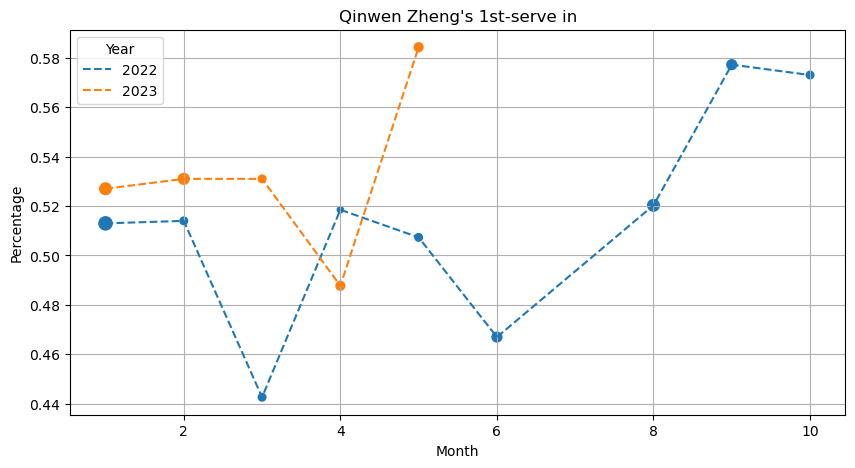

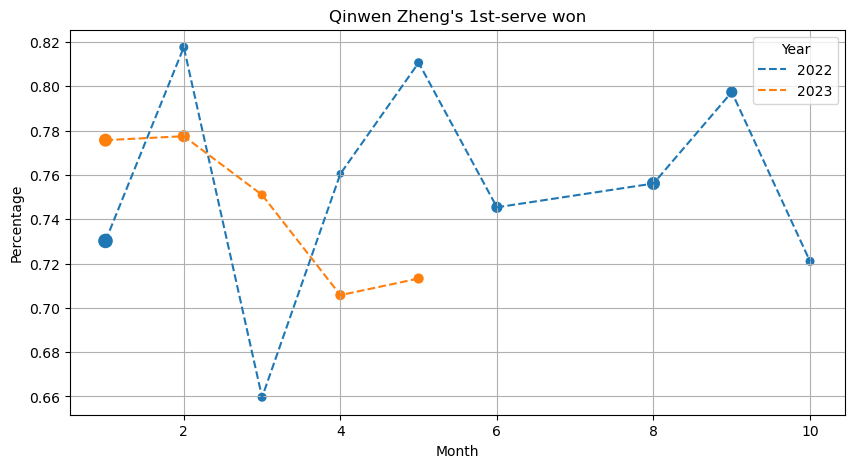

In [43]:
yearDf = groupByYearAndMonth(df)
yearCurve(yearDf, firstServeIn, 'Qinwen Zheng\'s 1st-serve in')
yearCurve(yearDf, firstServeWin, 'Qinwen Zheng\'s 1st-serve won')

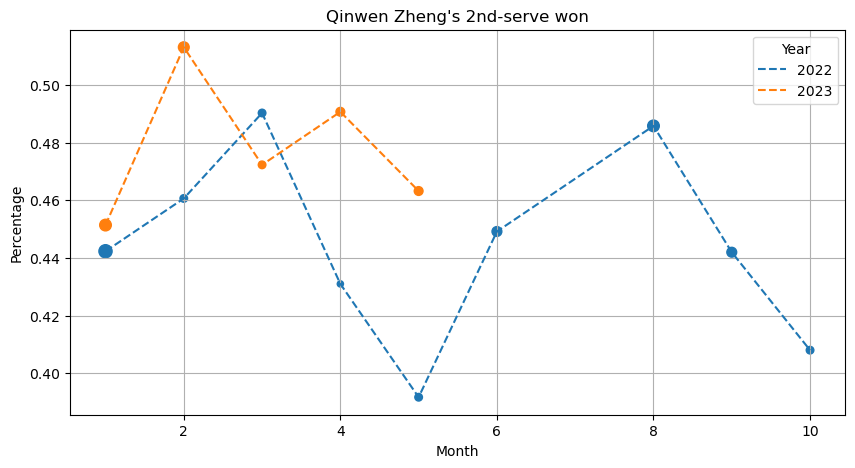

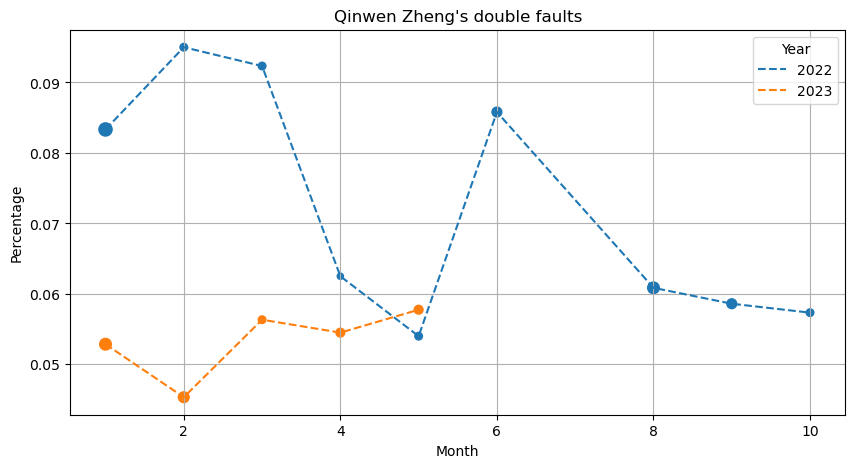

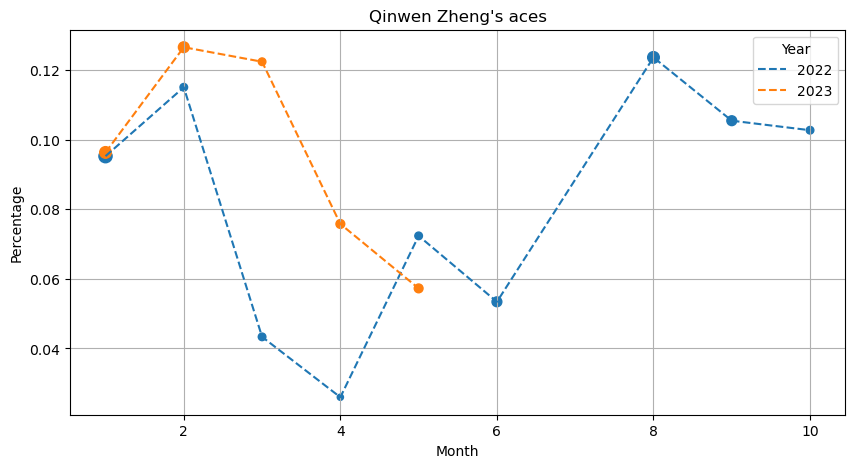

In [44]:
yearCurve(yearDf, secondServeWin, 'Qinwen Zheng\'s 2nd-serve won')
yearCurve(yearDf, dfRate, 'Qinwen Zheng\'s double faults')
yearCurve(yearDf, aceRate, 'Qinwen Zheng\'s aces')

## group by players' levels

/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_26492/619539820.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearDf = df.groupby(['year', 'month'])[firstServeIn, firstServeWin, secondServeWin].mean().reset_index()


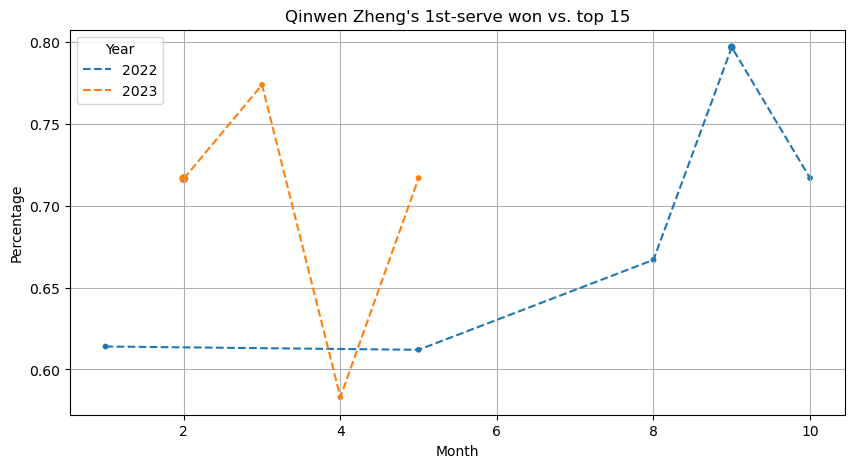

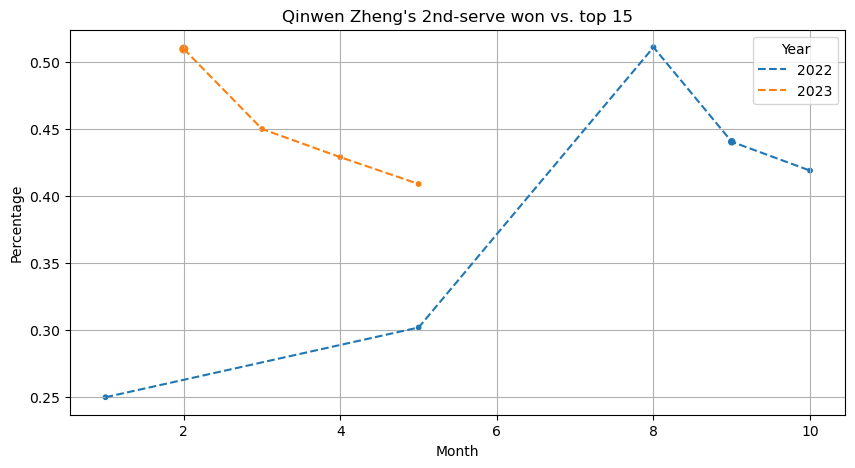

In [34]:
year15Df = groupByYearAndMonth(top15df)
yearCurve(year15Df, firstServeWin, 'Qinwen Zheng\'s 1st-serve won vs. top 15')
yearCurve(year15Df, secondServeWin, 'Qinwen Zheng\'s 2nd-serve won vs. top 15')


/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_26492/2616871590.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearDf = df.groupby(['year', 'month'])[firstServeIn, firstServeWin, secondServeWin].mean().reset_index()


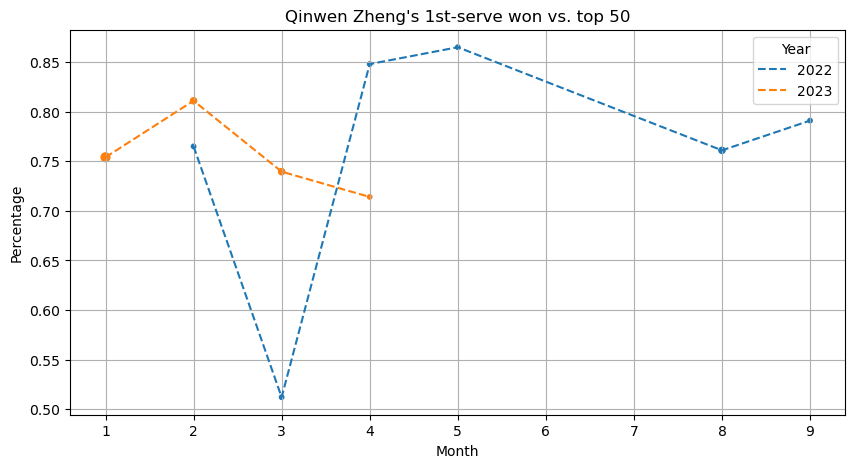

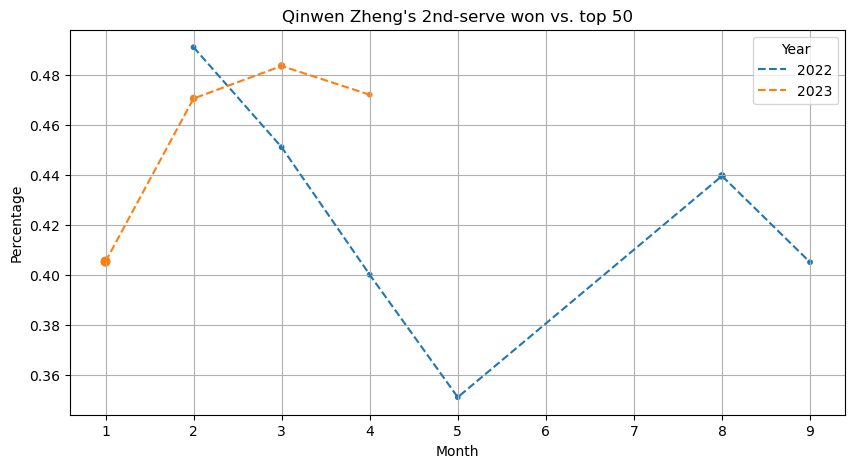

In [29]:
year50Df = groupByYearAndMonth(top50df)
yearCurve(year50Df, firstServeWin, 'Qinwen Zheng\'s 1st-serve won vs. top 50')
yearCurve(year50Df, secondServeWin, 'Qinwen Zheng\'s 2nd-serve won vs. top 50')

/var/folders/3w/s6x8d3hs02n89t530hlr93gh0000gn/T/ipykernel_26492/2616871590.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearDf = df.groupby(['year', 'month'])[firstServeIn, firstServeWin, secondServeWin].mean().reset_index()


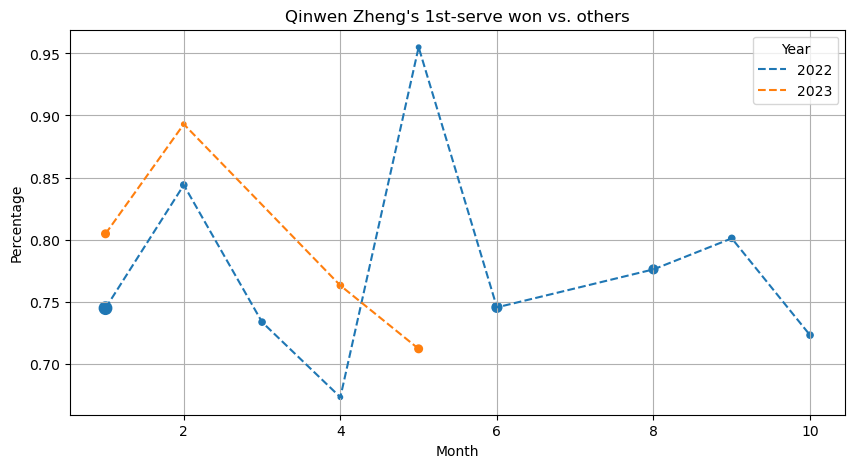

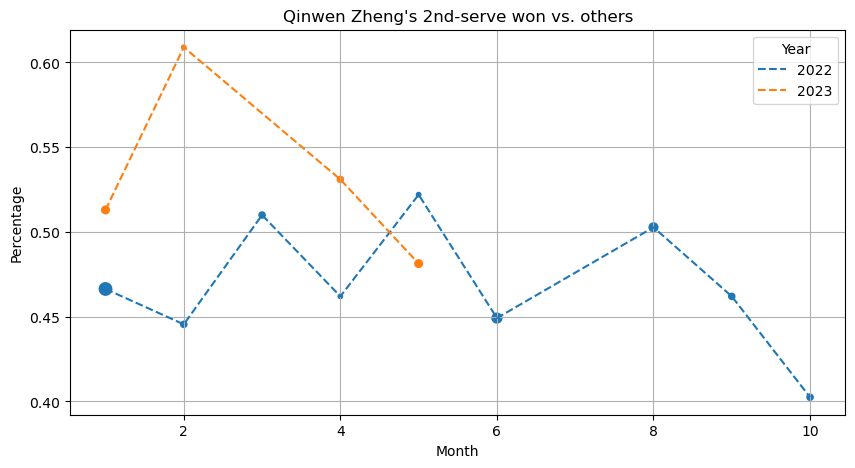

In [31]:
yearOthersDf = groupByYearAndMonth(othersDf)
yearCurve(yearOthersDf, firstServeWin, 'Qinwen Zheng\'s 1st-serve won vs. others')
yearCurve(yearOthersDf, secondServeWin, 'Qinwen Zheng\'s 2nd-serve won vs. others')

## Compare to other WTA players

### 1. top 10 average

### compare to Rybakina

In [17]:
allDf = pd.read_csv('processed/allPlayerStats.csv')
rank = 'Rk'
player = 'Player'
serviceGamesHold = 'Hld%'
# service points won in play
spwinp = 'SPW-InP'
aceRate2 = 'Ace%'
secondServeWonInPlay = '2%-InP'
# convert to float
cols_to_convert = [firstServeIn, firstServeWin, secondServeWin, serviceGamesHold, aceRate2, dfRate, secondServeWonInPlay]
for col in cols_to_convert:
    allDf[col] = allDf[col].str.rstrip('%').astype('float') / 100.0
    
allDf['top10'] = allDf[rank] <= 10
top10Df = allDf[(allDf[rank] <= 10) | (allDf[player] == 'Qinwen Zheng [CHN]')]


allDf = allDf.dropna()
allDf

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG,top10
0,1.0,Iga Swiatek [POL],63.0,51-12,81.0%,63.1%,63.8%,113.0,0.030,105.0,0.028,8.3%,0.664,0.680,0.535,0.583,0.791,6.2,2.3,True
1,2.0,Aryna Sabalenka [BLR],57.0,43-14,75.4%,60.5%,62.5%,315.0,0.076,322.0,0.078,19.4%,0.600,0.705,0.457,0.567,0.758,6.6,2.6,True
2,3.0,Jessica Pegula [USA],64.0,46-18,71.9%,60.0%,61.1%,149.0,0.036,168.0,0.040,9.7%,0.589,0.666,0.507,0.562,0.726,6.5,2.6,True
3,4.0,Elena Rybakina [KAZ],66.0,49-17,74.2%,63.6%,61.9%,475.0,0.108,167.0,0.038,8.7%,0.563,0.739,0.504,0.552,0.796,6.5,2.4,True
4,5.0,Caroline Garcia [FRA],79.0,58-21,73.4%,64.2%,63.2%,518.0,0.090,215.0,0.037,9.5%,0.608,0.734,0.498,0.551,0.830,6.5,2.3,True
5,6.0,Cori Gauff [USA],57.0,37-20,64.9%,59.5%,60.3%,249.0,0.067,211.0,0.057,15.9%,0.641,0.668,0.465,0.553,0.723,6.6,2.7,True
6,7.0,Ons Jabeur [TUN],47.0,33-14,70.2%,59.8%,59.6%,172.0,0.055,104.0,0.033,7.8%,0.571,0.689,0.477,0.517,0.719,6.4,2.6,True
7,8.0,Maria Sakkari [GRE],60.0,38-22,63.3%,59.8%,60.7%,256.0,0.056,233.0,0.051,12.4%,0.587,0.677,0.485,0.554,0.736,6.6,2.6,True
8,9.0,Daria Kasatkina [RUS],53.0,30-23,56.6%,54.4%,56.5%,66.0,0.017,195.0,0.051,18.3%,0.722,0.599,0.401,0.491,0.601,6.8,3.1,True
9,10.0,Petra Kvitova [CZE],47.0,34-13,72.3%,62.4%,64.4%,249.0,0.074,243.0,0.072,19.5%,0.630,0.704,0.486,0.604,0.780,6.6,2.5,True


In [18]:
import altair as alt
import numpy as np
alt.Chart(top10Df, title="First serves: Qinwen Zheng vs other WTA top 10 players' ").mark_circle(size=60).encode(
        alt.X(firstServeIn,
        scale=alt.Scale(zero=False), title ='1st-serve in'
        ),
        alt.Y(firstServeWin,
        scale=alt.Scale(zero=False), title = '1st-serve won'
        ),
        color='top10',
        tooltip=[player, firstServeIn, firstServeWin, rank]
).interactive()

alt.Chart(...)

In [19]:
alt.Chart(top10Df, title="Second serves: Qinwen Zheng vs other WTA top 10 players").mark_circle(size=60).encode(
        alt.X(secondServeWin, scale=alt.Scale(zero=False), title = "2nd serve won"),
        alt.Y(secondServeWonInPlay, scale=alt.Scale(zero=False), title = "2nd serve won in play"),
        color='top10',tooltip=[player, rank, secondServeWin, secondServeWonInPlay]).interactive()

alt.Chart(...)

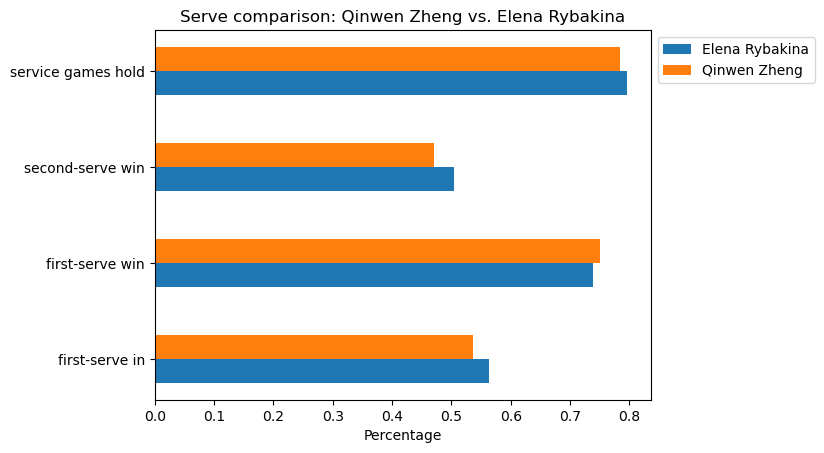

In [20]:
columnsOfInterest = [firstServeIn, firstServeWin, secondServeWin, serviceGamesHold]
ylabels = ['first-serve in', 'first-serve win', 'second-serve win', 'service games hold']
qinwen = top10Df[top10Df[player] == 'Qinwen Zheng [CHN]'][columnsOfInterest].values.flatten().tolist()
rybakina = top10Df[top10Df[player] == 'Elena Rybakina [KAZ]'][columnsOfInterest].values.flatten().tolist()
N =  len(columnsOfInterest)
x = np.arange(N)
width = 0.25

# Data on X-axis
# Position of bars on x-axis
ind = np.arange(N)

# Figure size   
fig, ax = plt.subplots()
# Plotting
ax.barh(ind, rybakina, width, label='Elena Rybakina')
ax.barh(ind + width, qinwen, width, label='Qinwen Zheng')

#ax.grid(True)
ax.set_xlabel('Percentage')
ax.set_title('Serve comparison: Qinwen Zheng vs. Elena Rybakina')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.yticks(ind + width / 2, ylabels)
# Finding the best position for legends and putting it
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



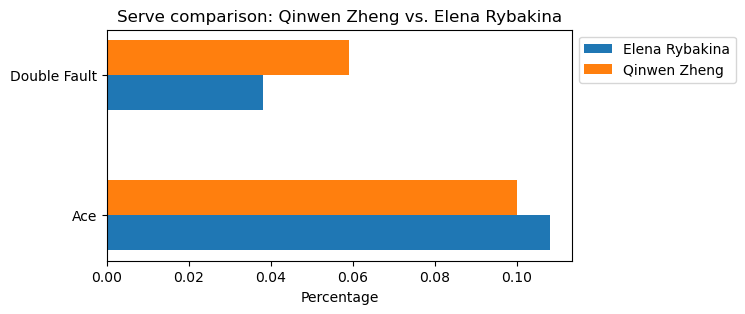

In [21]:
columnsOfInterest = ['Ace%', dfRate]
ylabels = ['Ace', 'Double Fault']
qinwen = top10Df[top10Df[player] == 'Qinwen Zheng [CHN]'][columnsOfInterest].values.flatten().tolist()
rybakina = top10Df[top10Df[player] == 'Elena Rybakina [KAZ]'][columnsOfInterest].values.flatten().tolist()
N =  len(columnsOfInterest)
x = np.arange(N)
width = 0.25

# Data on X-axis
# Position of bars on x-axis
ind = np.arange(N)

# Figure size   
fig, ax = plt.subplots(figsize=(6, 3))
# Plotting
ax.barh(ind, rybakina, width, label='Elena Rybakina')
ax.barh(ind + width, qinwen, width, label='Qinwen Zheng')

#ax.grid(True)
ax.set_xlabel('Percentage')
ax.set_title('Serve comparison: Qinwen Zheng vs. Elena Rybakina')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.yticks(ind + width / 2, ylabels)
# Finding the best position for legends and putting it
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [22]:
alt.Chart(allDf, title="First serve in vs. rank").mark_circle(size=60).encode(
        alt.X(firstServeIn, scale=alt.Scale(zero=False), title = "1st serve in"),
        alt.Y(rank, scale=alt.Scale(zero=False), title = "rank"),
        color='top10',tooltip=[player, rank, secondServeWin, secondServeWonInPlay]).interactive()

alt.Chart(...)

In [23]:
alt.Chart(allDf, title="First serve won vs. rank").mark_circle(size=60).encode(
        alt.X(firstServeWin, scale=alt.Scale(zero=False), title = "1st serve won"),
        alt.Y(rank, scale=alt.Scale(zero=False), title = "rank"),
        color='top10',tooltip=[player, rank, secondServeWin, secondServeWonInPlay]).interactive()

alt.Chart(...)

In [24]:
alt.Chart(allDf, title="Second serve won vs. rank").mark_circle(size=60).encode(
        alt.X(secondServeWin, scale=alt.Scale(zero=False), title = "2nd serve won"),
        alt.Y(rank, scale=alt.Scale(zero=False), title = "rank"),
        color='top10',tooltip=[player, rank, secondServeWin, secondServeWonInPlay]).interactive()

alt.Chart(...)

In [25]:
alt.Chart(df, title="How does the 1st-serve quality influence Zheng's match outcome").mark_circle(size=60).encode(
        alt.X(firstServeIn, scale=alt.Scale(zero=False), title = "1st serve in"),
        alt.Y(firstServeWin, scale=alt.Scale(zero=False), title = "1st serve won"),
        color=win, tooltip=[firstServeIn, firstServeWin, playerNames, score]).interactive()

alt.Chart(...)

In [26]:
alt.Chart(df, title="How does the 2nd-serve quality influence Zheng's match outcome").mark_circle(size=60).encode(
        alt.X(aceRate, scale=alt.Scale(zero=False), title = "Ace rate"),
        alt.Y(dfRate, scale=alt.Scale(zero=False), title = "Double Fault rate"),
        color=win, tooltip=[aceRate, dfRate, playerNames, score]).interactive()

alt.Chart(...)